In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import sys
import sklearn
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  
np.set_printoptions(threshold=sys.maxsize)   
pd.set_option('display.max_colwidth', None)

In [40]:
def convert_to_csv(string_name, sheet_name, directory):
    string1 = directory
    file_name =  string1 + string_name + '.xlsx'
    print(file_name)
    read_file = pd.read_excel (file_name, sheet_name = sheet_name, header = None)
    print(np.shape(read_file))
    read_file.to_csv (string1 + string_name + '.csv', index = None)
def change_dir(index):
    dir_win = 'J:/project files/lab_files/lump_project/data/moldir_blind_exp/'
    dir_mac = '/Volumes/Samsung_T5/project files/lab_files/lump_project/data/moldir_blind_exp/'
    if index == 1:
        directory = dir_mac
    else:
        directory = dir_win
    os.chdir(directory)
    os.listdir()
    file_name_1 = 'with_glove_all_copy'
    sheet_name1 = 'Moldir_with_glove'
    file_name_2 = 'without_glove_all_copy'
    sheet_name2 = 'Moldir_without_glove'
    convert_to_csv(file_name_1, sheet_name1, directory)
    convert_to_csv(file_name_2, sheet_name2, directory)
def take_out_condition(file, index, cut_off):
    return file.iloc[:, index:cut_off:3]
def correct_labels(data, labels):
    data_all = pd.DataFrame()
    data_s2 = pd.Series()
    data_s3 = pd.DataFrame()
    if len(labels) == 2:
        for index in range(3): 
            data_s = data.iloc[:, 3*(index):3*(index+1)]
            data_s2 = data_s.replace([1, 0], [labels[0], labels[1]])
            data_all = pd.concat([data_all, data_s2], axis = 1)
    elif len(labels) == 1:
        for index in range(3): 
            data_s = data.iloc[:, 3*(index):3*(index+1)]
            data_s2 = data_s.replace(['1'], [labels[0]]) 
            data_all = pd.concat([data_all, data_s2], axis = 1)
    else:
        for index in range(3): 
            data_s = data.iloc[:, 3*(index):3*(index+1)]
            data_s2 = data_s.replace(["1", "0"], [labels[index], "NOLUMP"])
#             data_s3 = data_s2.replace(" ", "")
            data_all = pd.concat([data_all, data_s2], axis = 1)
    return data_all
def transform_to_1d(data):
    data_shape = np.shape(data)
    data_t = data.transpose()
    data_1d = (data_t.values.reshape(1, data_shape[1]*data_shape[0]))
    data_1d = pd.DataFrame(data_1d[0])
    return data_1d
def correct_data_labels(data_all_with_glove, index, LP_labels, S_labels, L_labels):
    shape = np.shape(data_all_with_glove)
    cut_off = shape[1]//index
    if index == 1:
        start_point = shape[1]//2
    elif index == 2: 
        start_point = 0  
    data_all_with_glove_LP = take_out_condition(data_all_with_glove, start_point + 0, cut_off)
    data_all_with_glove_S = take_out_condition(data_all_with_glove, start_point + 1, cut_off)
    data_all_with_glove_L = take_out_condition(data_all_with_glove, start_point + 2, cut_off)
    df_with_glove_LP = correct_labels(data_all_with_glove_LP, LP_labels)
    df_with_glove_S = correct_labels(data_all_with_glove_S, S_labels)
    df_with_glove_L = correct_labels(data_all_with_glove_L, L_labels)
    df_with_glove_LP_1d = transform_to_1d(df_with_glove_LP)    
    df_with_glove_S_1d = transform_to_1d(df_with_glove_S)
    df_with_glove_L_1d = transform_to_1d(df_with_glove_L)
    df_with_glove_LP_1d = df_with_glove_LP_1d.replace(['LUMP', 'NOLUMP'], ['1', '0']) 
    df_with_glove_S_1d = df_with_glove_S_1d.replace(['s', 'm', 'l', 'NOLUMP'], ['0', '1', '2','-1']) 
    df_with_glove_L_1d = df_with_glove_S_1d.replace(['t', 'm', 'b', 'NOLUMP'], ['0', '1', '2','-1']) 
    df_with_glove = pd.concat([df_with_glove_LP_1d, df_with_glove_S_1d, df_with_glove_L_1d], axis = 1)
    df_with_glove.columns = ['LP_p', 'S_p', 'L_p']
    return df_with_glove
############################################################
def condition_data(index_dir, data_all_with_glove):
    change_dir(index_dir)
    LP_lump_labels = ["LUMP", "NOLUMP"]
    S_lump_labels = ["s", "m", "l"]
    L_lump_labels = ["t", "m", "b"]
    LP_no_lump_labels = ["NOLUMP", "LUMP"]
    S_no_lump_labels = ["NOLUMP"]    
    L_no_lump_labels = ["NOLUMP"]
    df_with_glove_l = correct_data_labels(data_all_with_glove, 2, LP_lump_labels, S_lump_labels, L_lump_labels)
    df_with_glove_no_l = correct_data_labels(data_all_with_glove, 1,LP_no_lump_labels, S_no_lump_labels, L_no_lump_labels)
    df_with_glove = pd.concat([df_with_glove_l, df_with_glove_no_l], axis = 0)
    return df_with_glove
    ############################################################
# data_all_with_glove = pd.read_csv("without_glove_all_copy.csv", sep=',')
index_dir = 2

data_all_with_glove = pd.read_csv("with_glove_all_copy.csv", sep=',')
data_all_without_glove = pd.read_csv("without_glove_all_copy.csv", sep=',')

df_with_glove = condition_data(index_dir, data_all_with_glove)
df_without_glove = condition_data(index_dir, data_all_without_glove)

J:/project files/lab_files/lump_project/data/moldir_blind_exp/with_glove_all_copy.xlsx
(80, 54)
J:/project files/lab_files/lump_project/data/moldir_blind_exp/without_glove_all_copy.xlsx
(80, 54)
J:/project files/lab_files/lump_project/data/moldir_blind_exp/with_glove_all_copy.xlsx


<ipython-input-40-75d9257e950f>:27: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  data_s2 = pd.Series()


(80, 54)
J:/project files/lab_files/lump_project/data/moldir_blind_exp/without_glove_all_copy.xlsx
(80, 54)


# UP TO HERE WORKS GOOD

In [ ]:
def combine_labels(index,df_LP, df_S, df_L):
    combined_labels = pd.DataFrame()
    combined_labels_with_glove_no_lump = pd.DataFrame()
    if index = 0:
        for index in range(len(df_LP.columns[:])):
            combined_labels = pd.Series(df_LP.iloc[:, index]) + "_"+ pd.Series(df_S.iloc[:, index])+ "_" + pd.Series(df_L.iloc[:, index])
            combined_labels_= pd.concat([combined_labels_, combined_labels], axis = 1)
    if index = 1:
        for index in range(len(df_with_glove_LP.columns[:])):
            combined_labels = pd.Series(df_LP.iloc[:, index]) + "_"+ pd.Series(df_S.iloc[:, index])
            combined_labels_ = pd.concat([combined_labels_, combined_labels], axis = 1)
    if index = 2:
        for index in range(len(df_with_glove_LP.columns[:])):
            combined_labels = pd.Series(df_LP.iloc[:, index]) +  "_" + pd.Series(df_L.iloc[:, index])
            combined_labels_ = pd.concat([combined_labels_, combined_labels], axis = 1)
    return combined_labels_
    ## 
###COMBINE LABELS

combined_labels = pd.DataFrame()
combined_labels_with_glove_lump = pd.DataFrame()
for index in range(len(df_with_glove_LP.columns[:])):
    combined_labels = pd.Series(df_with_glove_LP.iloc[:, index]) + '_'+ pd.Series(df_with_glove_S.iloc[:, index])+ '_' + pd.Series(df_with_glove_L.iloc[:, index])
    combined_labels_with_glove_lump = pd.concat([combined_labels_with_glove_lump, combined_labels], axis = 1)

    combined_labels_with_glove_lump_1d = transform_to_1d(combined_labels_with_glove_lump) 
combined_labels_with_glove_lump_no_l_1d = transform_to_1d(combined_labels_with_glove_no_lump) 


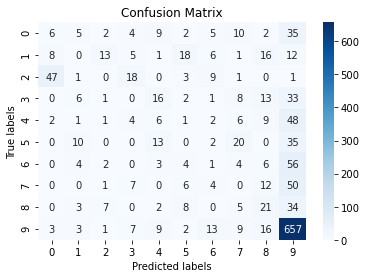

In [5]:
combined_labels = pd.DataFrame()
combined_labels_with_glove_no_lump = pd.DataFrame()
for index in range(len(df_with_glove_LP.columns[:])):
    combined_labels = pd.Series(df_with_glove_LP_no_l.iloc[:, index]) + "_"+ pd.Series(df_with_glove_S_no_l.iloc[:, index])+ "_" + pd.Series(df_with_glove_L_no_l.iloc[:, index])
    combined_labels_with_glove_no_lump = pd.concat([combined_labels_with_glove_no_lump, combined_labels], axis = 1)
##
combined_labels = pd.DataFrame()
combined_labels_with_glove_lump = pd.DataFrame()
for index in range(len(df_with_glove_LP.columns[:])):
    combined_labels = pd.Series(df_with_glove_LP.iloc[:, index]) + '_'+ pd.Series(df_with_glove_S.iloc[:, index])+ '_' + pd.Series(df_with_glove_L.iloc[:, index])
    combined_labels_with_glove_lump = pd.concat([combined_labels_with_glove_lump, combined_labels], axis = 1)

    combined_labels_with_glove_lump_1d = transform_to_1d(combined_labels_with_glove_lump) 
combined_labels_with_glove_lump_no_l_1d = transform_to_1d(combined_labels_with_glove_no_lump) 

# WITH GLOVE FOR THE ALL CASES
LP_labels = ["LUMP_s_t","LUMP_s_m", "LUMP_s_b", "LUMP_m_t","LUMP_m_m", "LUMP_m_b", "LUMP_l_t","LUMP_l_m", "LUMP_l_b"]

y_pred = pd.concat([combined_labels_with_glove_lump_1d, combined_labels_with_glove_lump_no_l_1d])
# y_pred
l =["LUMP_s_t","LUMP_s_m", "LUMP_s_b", "LUMP_m_t","LUMP_m_m", "LUMP_m_b", "LUMP_l_t","LUMP_l_m", "LUMP_l_b","NOLUMP_NOLUMP_NOLUMP"]
##########################
y_test_L1 = pd.DataFrame()
y_test_NL = pd.DataFrame()
y_test_L = pd.DataFrame()
for labels in range(len(LP_labels)):  
    y_test_L1 = pd.concat([pd.Series(LP_labels[labels])]*np.shape(df_with_glove_LP)[0])
    y_test_L = pd.concat([y_test_L, y_test_L1])
    
y_test_NL = pd.concat([pd.DataFrame(['NOLUMP_NOLUMP_NOLUMP'])]*np.shape(df_with_glove_LP_1d)[0])
y_test = pd.concat([y_test_L, y_test_NL])
##########################

conf_matrix = confusion_matrix(y_test, y_pred )
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['0','1', '2', '3','4', '5', '6','7', '8', '9']); 
# ax.yaxis.set_ticklabels(['0','1', '2', '3','4', '5', '6','7', '8', '9']);


In [7]:
def plot_CM(df_LP, df_S, df_L, df_LP_no_l, df_S_no_l, df_L_no_l, LP_labels, LP_labels_no_l):
    #COMBINE NO LUMP
    combined_labels = pd.DataFrame()
    combined_labels_no_lump = pd.DataFrame()
    for index in range(len(df_LP.columns[:])):
        combined_labels = pd.Series(df_LP.iloc[:, index]) + "_"+ pd.Series(df_S.iloc[:, index])+ "_" + pd.Series(df_L.iloc[:, index])
        combined_labels_no_lump = pd.concat([combined_labels_no_lump, combined_labels], axis = 1)
    #COMBINE LUMP
    combined_labels = pd.DataFrame()
    combined_labels_lump = pd.DataFrame()
    for index in range(len(df_LP.columns[:])):
        combined_labels = pd.Series(df_LP.iloc[:, index]) + '_'+ pd.Series(df_S.iloc[:, index])+ '_' + pd.Series(df_L.iloc[:, index])
        combined_labels_lump = pd.concat([combined_labels_lump, combined_labels], axis = 1)
    combined_labels_lump_1d = transform_to_1d(combined_labels_lump) 
    combined_labels_lump_no_l_1d = transform_to_1d(combined_labels_no_lump) 

    # WITH GLOVE FOR THE ALL CASES
    y_test_L1 = pd.DataFrame()
    y_test_NL = pd.DataFrame()
    y_test_L = pd.DataFrame()
    for labels in range(len(LP_labels)):  
        y_test_L1 = pd.concat([pd.Series(LP_labels[labels])]*np.shape(df_LP)[0])
        y_test_L = pd.concat([y_test_L, y_test_L1])

    y_test_NL = pd.concat([pd.DataFrame([LP_labels_no_l])]*np.shape(df_LP_1d)[0])
    y_test = pd.concat([y_test_L, y_test_NL])
    y_pred = pd.concat([combined_labels_lump_1d, combined_labels_lump_no_l_1d])
    # l =["LUMP_s_t","LUMP_s_m", "LUMP_s_b", "LUMP_m_t","LUMP_m_m", "LUMP_m_b", "LUMP_l_t","LUMP_l_m", "LUMP_l_b","NOLUMP_NOLUMP_NOLUMP"]
    # , rotation = 45, ha="right"
    conf_matrix = confusion_matrix(y_test, y_pred )

    ax = plt.subplot()
    sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');  
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ####################################

## up to here everything is fine

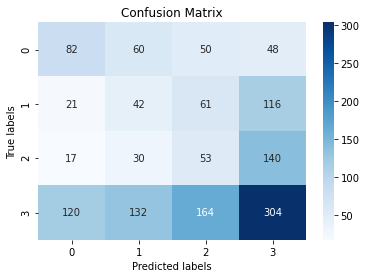

In [8]:
###COMBINE LABELS
combined_labels = pd.DataFrame()
combined_labels_with_glove_lump = pd.DataFrame()
for index in range(len(df_with_glove_LP.columns[:])):
    combined_labels = pd.Series(df_with_glove_LP.iloc[:, index]) + "_"+ pd.Series(df_with_glove_S.iloc[:, index])
    combined_labels_with_glove_lump = pd.concat([combined_labels_with_glove_lump, combined_labels], axis = 1)
combined_labels = pd.DataFrame()    
combined_labels_with_glove_no_lump = pd.DataFrame()
for index in range(len(df_with_glove_LP.columns[:])):
    combined_labels = pd.Series(df_with_glove_LP.iloc[:, index]) + "_"+ pd.Series(df_with_glove_S.iloc[:, index])
    combined_labels_with_glove_no_lump = pd.concat([combined_labels_with_glove_no_lump, combined_labels], axis = 1)
##
combined_labels_with_glove_lump_1d = transform_to_1d(combined_labels_with_glove_lump) 
combined_labels_with_glove_lump_no_l_1d = transform_to_1d(combined_labels_with_glove_no_lump) 


# WITH GLOVE FOR THE ALL CASES
LP_labels = ["LUMP_s", "LUMP_m", "LUMP_l"]
y_test_L1 = pd.DataFrame()
y_test_L = pd.DataFrame()

for labels in range(len(LP_labels)):  
    y_test_L1 = pd.concat([pd.Series(LP_labels[labels])]*np.shape(df_with_glove_LP)[0]*3)
    y_test_L = pd.concat([y_test_L, y_test_L1])
    
y_test_NL = pd.concat([pd.DataFrame(["NOLUMP_NOLUMP"])]*np.shape(df_with_glove_LP_1d)[0])
y_test = pd.concat([y_test_L, y_test_NL])
y_pred = pd.concat([combined_labels_with_glove_lump_1d, combined_labels_with_glove_lump_no_l_1d])
# y_pred
LP_labels = ["LUMP_s", "LUMP_m", "LUMP_l","NOLUMP_NOLUMP"]
conf_matrix = confusion_matrix(y_test.values[:, 0], y_pred.values[:, 0])
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels([LP_labels]); 
# ax.yaxis.set_ticklabels([LP_labels]);

In [12]:
y_pred

,0
0,NOLUMP_NOLUMP
1,NOLUMP_NOLUMP
2,NOLUMP_NOLUMP
3,NOLUMP_NOLUMP
4,LUMP_t
...,...
715,NOLUMP_NOLUMP
716,NOLUMP_NOLUMP
717,NOLUMP_NOLUMP
718,NOLUMP_NOLUMP


In [13]:
y_test


,0
0,LUMP_t
0,LUMP_t
0,LUMP_t
0,LUMP_t
0,LUMP_t
...,...
0,NOLUMP_NOLUMP
0,NOLUMP_NOLUMP
0,NOLUMP_NOLUMP
0,NOLUMP_NOLUMP


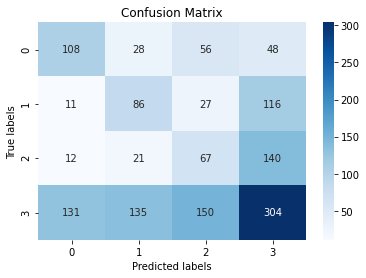

In [9]:
###COMBINE LABELS
combined_labels = pd.DataFrame()
combined_labels_with_glove_lump = pd.DataFrame()
for index in range(len(df_with_glove_LP.columns[:])):
    combined_labels = pd.Series(df_with_glove_LP.iloc[:, index]) + "_"+ pd.Series(df_with_glove_L.iloc[:, index])
    combined_labels_with_glove_lump = pd.concat([combined_labels_with_glove_lump, combined_labels], axis = 1)
combined_labels = pd.DataFrame()    
combined_labels_with_glove_no_lump = pd.DataFrame()
for index in range(len(df_with_glove_LP.columns[:])):
    combined_labels = pd.Series(df_with_glove_LP.iloc[:, index]) + "_"+ pd.Series(df_with_glove_L.iloc[:, index])
    combined_labels_with_glove_no_lump = pd.concat([combined_labels_with_glove_no_lump, combined_labels], axis = 1)
##
combined_labels_with_glove_lump_1d = transform_to_1d(combined_labels_with_glove_lump) 
combined_labels_with_glove_lump_no_l_1d = transform_to_1d(combined_labels_with_glove_no_lump) 


# WITH GLOVE FOR THE ALL CASES
LP_labels = ["LUMP_t", "LUMP_m", "LUMP_b"]
y_test_L1 = pd.DataFrame()
y_test_L = pd.DataFrame()

for labels in range(len(LP_labels)):  
    y_test_L1 = pd.concat([pd.Series(LP_labels[labels])]*np.shape(df_with_glove_LP)[0]*3)
    y_test_L = pd.concat([y_test_L, y_test_L1])
    
y_test_NL = pd.concat([pd.DataFrame(["NOLUMP_NOLUMP"])]*np.shape(df_with_glove_LP_1d)[0])
y_test = pd.concat([y_test_L, y_test_NL])
y_pred = pd.concat([combined_labels_with_glove_lump_1d, combined_labels_with_glove_lump_no_l_1d])
# y_pred
LP_labels = ["LUMP_t", "LUMP_m", "LUMP_b","NOLUMP_NOLUMP"]
conf_matrix = confusion_matrix(y_test.values[:, 0], y_pred.values[:, 0])
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels([LP_labels]); 
# ax.yaxis.set_ticklabels([LP_labels]);